# **1.Problem statement**

Given physicochemical test results of different wines (such as acidity, sugar, and alcohol content), build a classification model to predict the quality of wine (as good/bad or multi-class quality). This can help in automating wine quality assessment without human tasters.

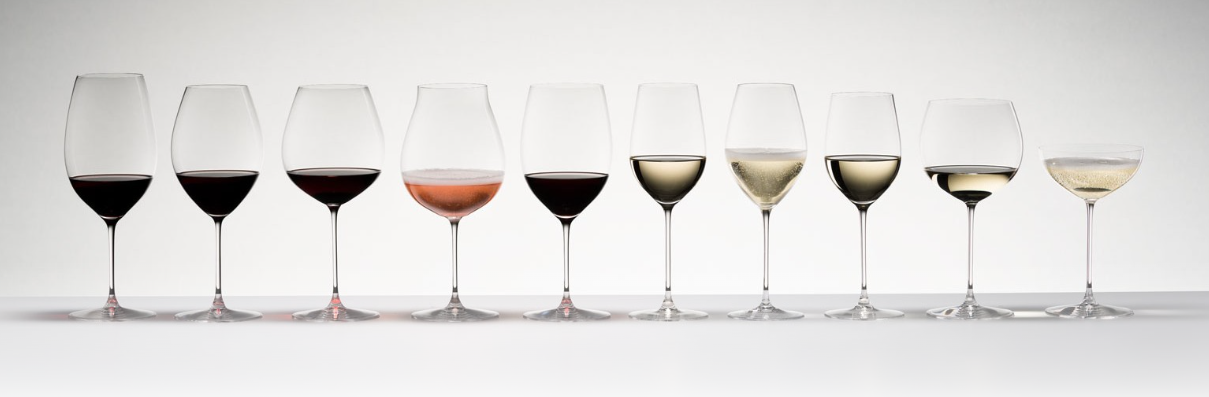

Import Necessary Libraries

In [ ]:
# Data handling
import pandas as pd     # For loading and handling datasets
import numpy as np       # For numerical computations
# Visualization (optional but useful for understanding data)
import matplotlib.pyplot as plt
import seaborn as sns
# Preprocessing
from sklearn.model_selection import train_test_split  # For splitting dataset
from sklearn.preprocessing import StandardScaler      # For scaling features
# KNN Model
from sklearn.neighbors import KNeighborsClassifier   # For classification
# Evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


**KNN is chosen here because:** -K-Nearest Neighbor algorithm

Wine quality depends on similarity → KNN directly uses similarity.

Dataset is small enough for KNN to run efficiently.

Good baseline before trying advanced models.

# **2.Data Collection**

In [ ]:
df=pd.read_csv("WineQT.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


# **3.Data Cleaning**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [ ]:
df.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


# **4.EDA**

In [ ]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3])

**Good (quality ≥ 6) vs Bad (quality < 6).**

Dropping **Id** column which has nothing to do with ML in predicting target

In [ ]:
df = df.drop(columns=['Id'])

Feature columns except target

In [ ]:
features = df.columns[:-1]

# **5.Feature Engineering**

Understanding feature importance

/tmp/ipython-input-479949596.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='quality', y=col, data=mean_values, palette="Set2")
/tmp/ipython-input-479949596.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='quality', y=col, data=mean_values, palette="Set2")
/tmp/ipython-input-479949596.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='quality', y=col, data=mean_values, palette="Set2")
/tmp/ipython-input-479949596.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. As

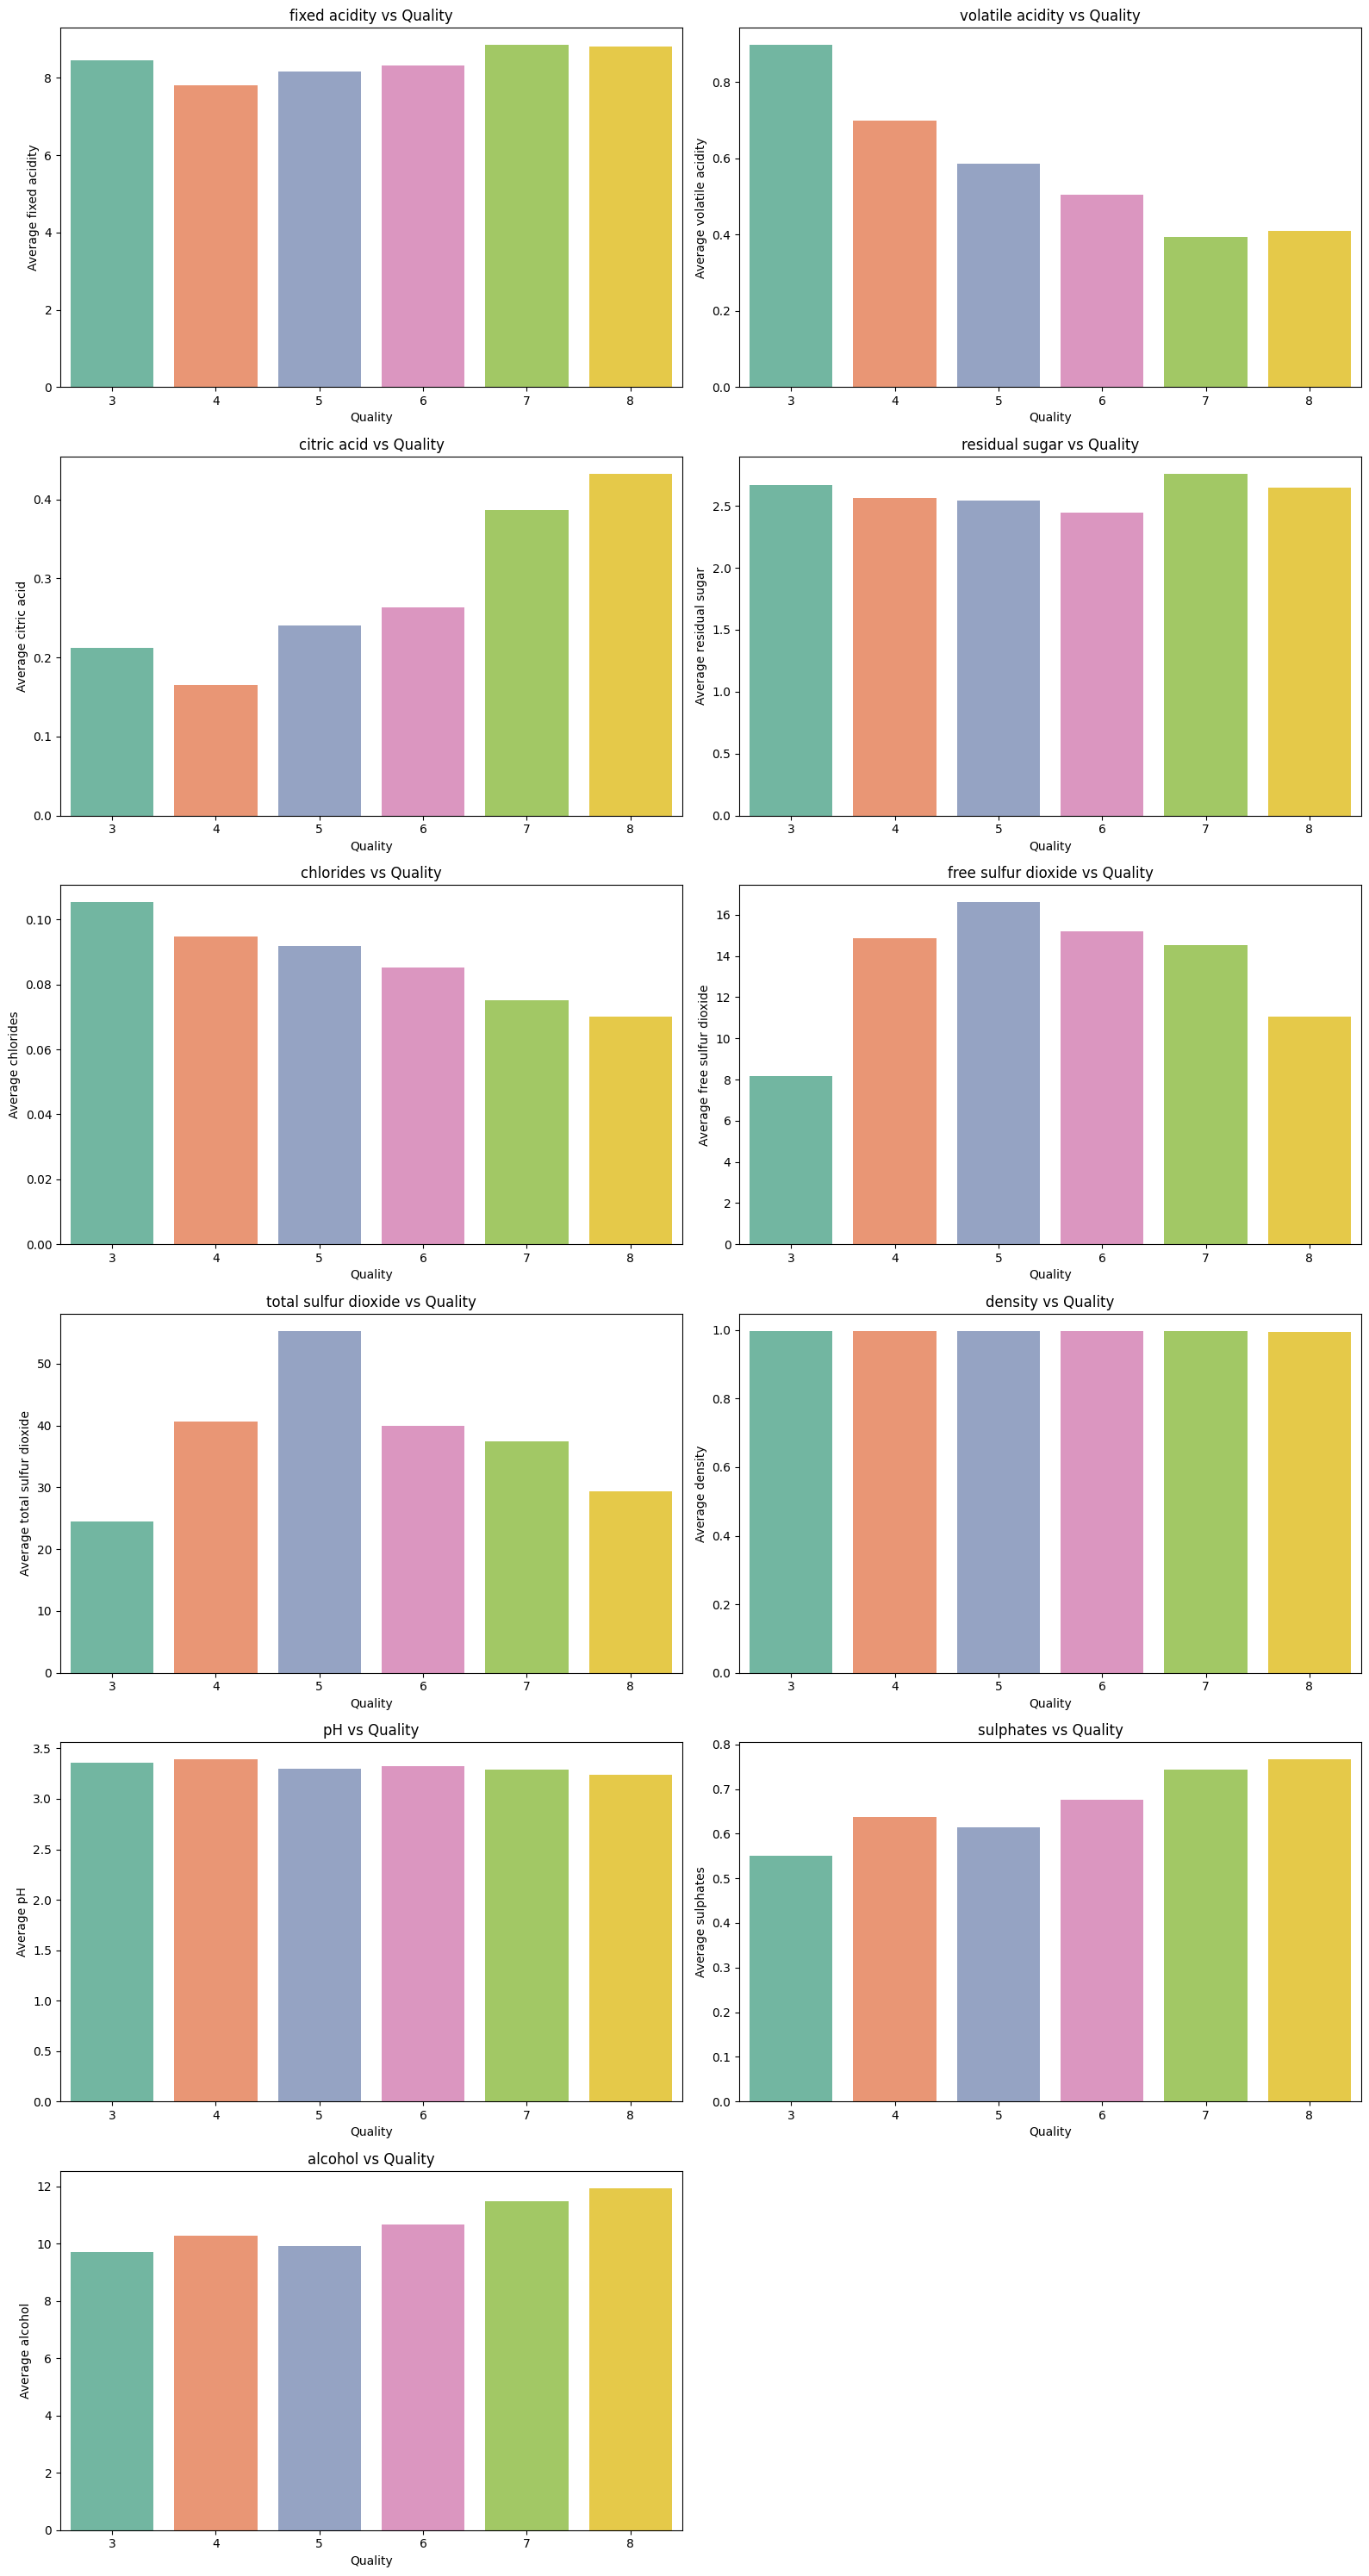

In [ ]:
plt.figure(figsize=(16, 30))

for i, col in enumerate(features, 1):
    plt.subplot(6, 2, i)  # 6 rows, 2 cols grid
    # Calculate mean of feature for each quality
    mean_values = df.groupby('quality')[col].mean().reset_index()
    sns.barplot(x='quality', y=col, data=mean_values, palette="Set2")
    plt.title(f"{col} vs Quality", fontsize=12)
    plt.xlabel("Quality")
    plt.ylabel(f"Average {col}")

plt.tight_layout()
plt.show()

Making it professional

/tmp/ipython-input-3177278802.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-3177278802.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-3177278802.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-3177278802.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-3177278802.py:9: FutureWarning: 

Passing `pa

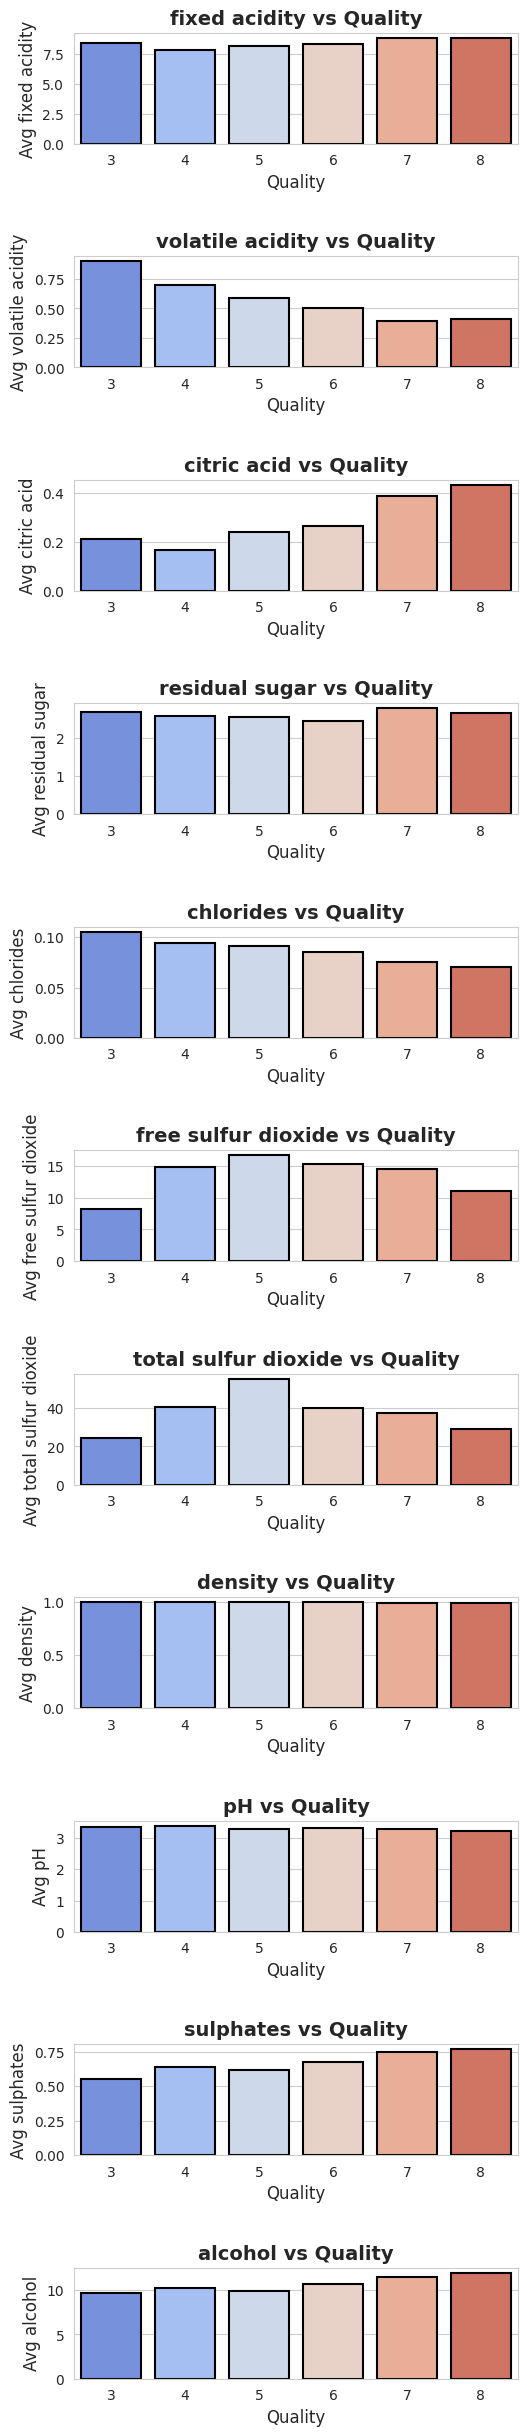

In [ ]:
sns.set_style("whitegrid")

# Bigger figure and better spacing
fig, axes = plt.subplots(nrows=11, ncols=1, figsize=(6, 25))  # 11 rows, 1 col

for i, col in enumerate(features):
    ax = axes[i]
    mean_values = df.groupby('quality')[col].mean().reset_index()
    sns.barplot(
        x='quality',
        y=col,
        data=mean_values,
        palette="coolwarm",
        edgecolor='black',
        linewidth=1.5,
        ax=ax
    )
    ax.set_title(f"{col} vs Quality", fontsize=14, fontweight='bold')
    ax.set_xlabel("Quality", fontsize=12)
    ax.set_ylabel(f"Avg {col}", fontsize=12)

plt.tight_layout(pad=3)  # adds space between subplots
plt.show()

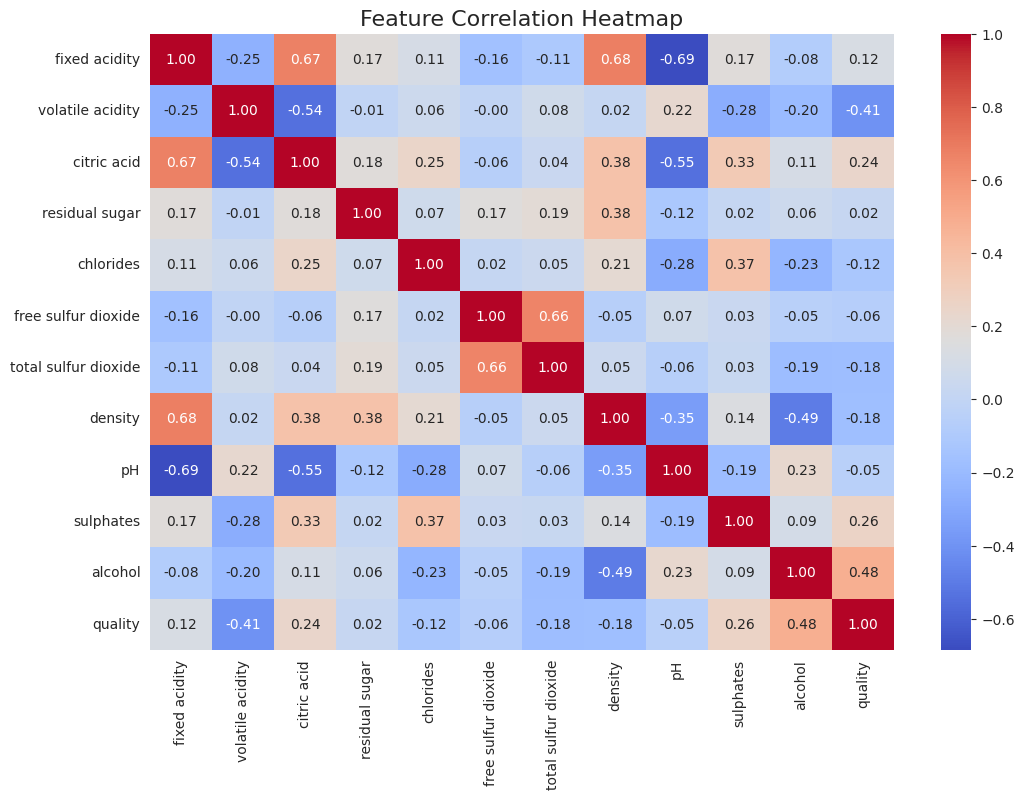

In [ ]:
correlation_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)

# Add title
plt.title("Feature Correlation Heatmap", fontsize=16)
plt.show()

## **Features most correlated with quality:**

Alcohol – 0.48

This is the strongest positive correlation.

Higher alcohol content is associated with higher wine quality.

Sulphates – 0.26

Moderate positive correlation.

Higher sulphate levels tend to relate to better quality, though less strongly than alcohol.

Citric acid – 0.24

Mild positive correlation.

Indicates that citric acid may contribute positively to quality.

🔻 Features negatively correlated with quality:

Volatile acidity – -0.41

Strongest negative correlation.

Higher volatile acidity is associated with lower wine quality.

Density – -0.18

Mild negative correlation.

Total sulfur dioxide – -0.18

Slightly negatively correlated.

✅ Summary:

Most Positive Influence on Quality: Alcohol, followed by Sulphates, and Citric acid.

Most Negative Influence on Quality: Volatile acidity.

# **6.Model Building**

In [ ]:
#Define features and target
X = df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
        'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
        'pH', 'sulphates', 'alcohol']]
y = df['quality']

In [ ]:
#Split dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Scale features (important for KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
#Initialize KNN model
knn = KNeighborsClassifier(n_neighbors=5)  # you can tune n_neighbors

In [ ]:
#Train the model
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [ ]:
#Make predictions
y_pred = knn.predict(X_test_scaled)


In [ ]:
#Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.5589519650655022

Confusion Matrix:
 [[ 0  4  2  0  0]
 [ 2 66 28  0  0]
 [ 1 34 55  9  0]
 [ 0  5 14  7  0]
 [ 0  0  2  0  0]]

Classification Report:
               precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.61      0.69      0.64        96
           6       0.54      0.56      0.55        99
           7       0.44      0.27      0.33        26
           8       0.00      0.00      0.00         2

    accuracy                           0.56       229
   macro avg       0.32      0.30      0.31       229
weighted avg       0.54      0.56      0.55       229



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Comparing performance with another Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier


In [ ]:
#(Optional) Scale features - Random Forest doesn't require scaling, but safe to do
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 6. Initialize Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)  # n_estimators = number of trees

# 7. Train the model
rf.fit(X_train_scaled, y_train)

# 8. Make predictions
y_pred = rf.predict(X_test_scaled)

# 9. Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.6986899563318777

Confusion Matrix:
 [[ 0  3  3  0  0]
 [ 0 77 18  1  0]
 [ 0 28 65  6  0]
 [ 0  0  8 18  0]
 [ 0  0  2  0  0]]

Classification Report:
               precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.71      0.80      0.75        96
           6       0.68      0.66      0.67        99
           7       0.72      0.69      0.71        26
           8       0.00      0.00      0.00         2

    accuracy                           0.70       229
   macro avg       0.42      0.43      0.43       229
weighted avg       0.67      0.70      0.68       229



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from xgboost import XGBClassifier

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Map the target to start from 0
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_encoded = le.fit_transform(y)  # y_encoded will be 0,1,2,3,4,5

# Then split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# (Optional) Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train XGBoost as before
xgb.fit(X_train_scaled, y_train)

# Make predictions
y_pred = xgb.predict(X_test_scaled)

# If you want original labels back for reporting
y_pred_original = le.inverse_transform(y_pred)
y_test_original = le.inverse_transform(y_test)

# Evaluate
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("Accuracy:", accuracy_score(y_test_original, y_pred_original))
print("\nConfusion Matrix:\n", confusion_matrix(y_test_original, y_pred_original))
print("\nClassification Report:\n", classification_report(y_test_original, y_pred_original))


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [17:27:08] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 0.6724890829694323

Confusion Matrix:
 [[ 0  4  2  0  0]
 [ 0 77 17  2  0]
 [ 0 31 60  7  1]
 [ 0  0  9 17  0]
 [ 0  0  2  0  0]]

Classification Report:
               precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.69      0.80      0.74        96
           6       0.67      0.61      0.63        99
           7       0.65      0.65      0.65        26
           8       0.00      0.00      0.00         2

    accuracy                           0.67       229
   macro avg       0.40      0.41      0.41       229
weighted avg       0.65      0.67      0.66       229



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
